In [1]:
import pandas as pd
df = pd.read_csv("credit_risk_dataset.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_amnt                   32581 non-null  int64  
 6   loan_int_rate               29465 non-null  float64
 7   loan_status                 32581 non-null  int64  
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 2.7+ MB


In [3]:
((df.isnull().sum())/df.shape[0])*100

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [4]:
df.duplicated().sum()

165

In [5]:
# Drop duplicated rows
df_cleaned = df.drop_duplicates()

In [6]:
df_cleaned.duplicated().sum()

0

In [7]:
df_cleaned["loan_int_rate"].describe()

count    29321.000000
mean        11.017265
std          3.241680
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

In [8]:
df_cleaned.sort_values(by="person_emp_length",ascending=False).head(10)

person_age  person_income person_home_ownership  person_emp_length  \
0              22          59000                  RENT              123.0   
210            21         192000              MORTGAGE              123.0   
32355          78          48000                  RENT               41.0   
32515          53         106000              MORTGAGE               38.0   
32428          58          49000              MORTGAGE               34.0   
32263          46         180000              MORTGAGE               31.0   
31866          47         178000                   OWN               31.0   
31867          46         180000              MORTGAGE               31.0   
30914          48          70000              MORTGAGE               31.0   
32539          61         148000              MORTGAGE               30.0   

             loan_intent  loan_amnt  loan_int_rate  loan_status  \
0               PERSONAL      35000          16.02            1   
210              VENTURE      20000           6.54            0   
32355            MEDICAL       3000           7.51            0   
32515           PERSONAL      20000           9.88            0   
32428            MEDICAL       7500          13.55            1   
32263            MEDICAL      18000           9.91            0   
31866            VENTURE       9000          10.99            0   
31867            VENTURE      18000           9.91            0   
30914    HOMEIMPROVEMENT       9000          14.54            0   
32539  DEBTCONSOLIDATION      24000          10.38            1   

       loan_percent_income cb_person_default_on_file  \
0                     0.59                         Y   
210                   0.10                         N   
32355                 0.06                         N   
32515                 0.19                         N   
32428                 0.15                         Y   
32263                 0.10                         N   
31866                 0.05                         N   
31867                 0.10                         N   
30914                 0.13                         N   
32539                 0.16                         N   

       cb_person_cred_hist_length  
0                               3  
210                             4  
32355                          25  
32515                          23  
32428                          24  
32263                          12  
31866                          17  
31867                          11  
30914                          17  
32539                          20

In [9]:
# Drop outliners of person_emp_length
df_cleaned1 = df_cleaned.drop(df_cleaned.sort_values(by="person_emp_length", ascending=False).head(2).index)

In [10]:
df_cleaned1.sort_values(by="person_age",ascending=False).head(10)

person_age  person_income person_home_ownership  person_emp_length  \
81            144         250000                  RENT                4.0   
32297         144        6000000              MORTGAGE               12.0   
183           144         200000              MORTGAGE                4.0   
747           123          78000                  RENT                7.0   
575           123          80004                  RENT                2.0   
32416          94          24000                  RENT                1.0   
32506          84          94800              MORTGAGE                2.0   
32422          80          64000                  RENT                7.0   
32355          78          48000                  RENT               41.0   
32534          76          75000                  RENT               23.0   

      loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
81        VENTURE       4800          13.57            0                 0.02   
32297    PERSONAL       5000          12.73            0                 0.00   
183     EDUCATION       6000          11.86            0                 0.03   
747       VENTURE      20000            NaN            0                 0.26   
575     EDUCATION      20400          10.25            0                 0.25   
32416     MEDICAL       6500            NaN            0                 0.27   
32506    PERSONAL      10000           7.51            0                 0.11   
32422     MEDICAL       6800          11.71            0                 0.11   
32355     MEDICAL       3000           7.51            0                 0.06   
32534     MEDICAL      15000           8.94            0                 0.20   

      cb_person_default_on_file  cb_person_cred_hist_length  
81                            N                           3  
32297                         N                          25  
183                           N                           2  
747                           N                           4  
575                           N                           3  
32416                         N                          27  
32506                         N                          24  
32422                         N                          25  
32355                         N                          25  
32534                         N                          25

In [11]:
# Drop outliners of person_emp_length
df_cleaned2 = df_cleaned.drop(df_cleaned.sort_values(by="person_age", ascending=False).head(5).index)

In [12]:
df_cleaned2.sort_values(by="cb_person_cred_hist_length",ascending=False).head(5)

person_age  person_income person_home_ownership  person_emp_length  \
32580          66          42000                  RENT                2.0   
32446          51          62046                  RENT                8.0   
32320          55          50000                  RENT                2.0   
32510          55          97243              MORTGAGE               10.0   
32508          53          95000                   OWN               24.0   

           loan_intent  loan_amnt  loan_int_rate  loan_status  \
32580          MEDICAL       6475           9.99            0   
32446          VENTURE       8000            NaN            0   
32320  HOMEIMPROVEMENT      20000           7.51            1   
32510         PERSONAL      17000            NaN            0   
32508         PERSONAL       6000           5.42            0   

       loan_percent_income cb_person_default_on_file  \
32580                 0.15                         N   
32446                 0.13                         N   
32320                 0.40                         N   
32510                 0.17                         N   
32508                 0.06                         N   

       cb_person_cred_hist_length  
32580                          30  
32446                          30  
32320                          30  
32510                          30  
32508                          30

In [13]:
df_cleaned2["loan_amnt"].quantile(.9)

19000.0

In [14]:
df["person_home_ownership"].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [15]:
df["loan_intent"].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [16]:
df["cb_person_default_on_file"].unique()

array(['Y', 'N'], dtype=object)

In [17]:
percent_null = df[(df['person_emp_length'].isnull()) & (df['loan_int_rate'].isnull())].shape[0] / df.shape[0] * 100
percent_null

0.20871059820140575

In [18]:
# Impute loan_int_rate: Since it is an important feature, we can fill missing values with the median value:
df_cleaned2['loan_int_rate'] = df_cleaned2['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [19]:
# Drop person_emp_length: Since it has a low correlation, we can drop rows with missing values for this feature 
df_cleaned2.dropna(subset=['person_emp_length'], inplace=True)

In [20]:
df_cleaned2.head(5)

person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y                           3  
1                         N                           2  
2                         N                           3  
3                         N                           2  
4                         Y                           4

In [21]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# One-hot encoding for 'person_home_ownership' and 'loan_intent', dropping the first category
df_cleaned2 = pd.get_dummies(df_cleaned2, columns=['person_home_ownership', 'loan_intent'], drop_first=True)

# Label encoding for 'cb_person_default_on_file'
label_encoder = LabelEncoder()
df_cleaned2['cb_person_default_on_file'] = label_encoder.fit_transform(df_cleaned2['cb_person_default_on_file'])

print(df_cleaned2.head())


   person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_status  loan_percent_income  cb_person_default_on_file  \
0            1                 0.59                          1   
1            0                 0.10                          0   
2            1                 0.57                          0   
3            1                 0.53                          0   
4            1                 0.55                          1   

   cb_person_cred_hist_length  person_home_ownership_OTHER  \
0                           3                        False   
1               

In [49]:
df_cleaned2.corr()

person_age  person_income  person_emp_length  \
person_age                     1.000000       0.141509           0.166152   
person_income                  0.141509       1.000000           0.152385   
person_emp_length              0.166152       0.152385           1.000000   
loan_amnt                      0.051989       0.313901           0.113243   
loan_int_rate                  0.008928      -0.003601          -0.054009   
loan_status                   -0.023200      -0.164885          -0.082803   
loan_percent_income           -0.040273      -0.293639          -0.053936   
cb_person_default_on_file      0.005879      -0.003564          -0.028036   
cb_person_cred_hist_length     0.878410       0.123849           0.144676   
person_home_ownership_OTHER   -0.008430       0.011072          -0.015040   
person_home_ownership_OWN      0.001148      -0.039826           0.026309   
person_home_ownership_RENT    -0.033427      -0.211893          -0.230432   
loan_intent_EDUCATION         -0.091598      -0.017726          -0.038502   
loan_intent_HOMEIMPROVEMENT    0.076344       0.052480           0.029952   
loan_intent_MEDICAL            0.019847      -0.039667          -0.002665   
loan_intent_PERSONAL           0.034943       0.008098           0.010093   
loan_intent_VENTURE           -0.013045       0.003699           0.011015   

                             loan_amnt  loan_int_rate  loan_status  \
person_age                    0.051989       0.008928    -0.023200   
person_income                 0.313901      -0.003601    -0.164885   
person_emp_length             0.113243      -0.054009    -0.082803   
loan_amnt                     1.000000       0.138734     0.112772   
loan_int_rate                 0.138734       1.000000     0.323976   
loan_status                   0.112772       0.323976     1.000000   
loan_percent_income           0.577332       0.117534     0.380198   
cb_person_default_on_file     0.039219       0.476124     0.181411   
cb_person_cred_hist_length    0.042513       0.013648    -0.017814   
person_home_ownership_OTHER   0.012496       0.016288     0.013461   
person_home_ownership_OWN    -0.022799      -0.006467    -0.102019   
person_home_ownership_RENT   -0.118161       0.126031     0.235135   
loan_intent_EDUCATION        -0.011474      -0.008475    -0.055682   
loan_intent_HOMEIMPROVEMENT   0.043844       0.019829     0.034443   
loan_intent_MEDICAL          -0.022810       0.005484     0.058131   
loan_intent_PERSONAL         -0.000873      -0.002677    -0.022750   
loan_intent_VENTURE          -0.000913      -0.008309    -0.077266   

                             loan_percent_income  cb_person_default_on_file  \
person_age                             -0.040273                   0.005879   
person_income                          -0.293639                  -0.003564   
person_emp_length                      -0.053936                  -0.028036   
loan_amnt                               0.577332                   0.039219   
loan_int_rate                           0.117534                   0.476124   
loan_status                             0.380198                   0.181411   
loan_percent_income                     1.000000                   0.036767   
cb_person_default_on_file               0.036767                   1.000000   
cb_person_cred_hist_length             -0.030475                   0.003518   
person_home_ownership_OTHER             0.011726                   0.014493   
person_home_ownership_OWN               0.045711                  -0.001528   
person_home_ownership_RENT              0.117331                   0.057991   
loan_intent_EDUCATION                  -0.001889                  -0.005726   
loan_intent_HOMEIMPROVEMENT            -0.016263                   0.015246   
loan_intent_MEDICAL                     0.014811                  -0.004766   
loan_intent_PERSONAL                   -0.003952                  -0.003623   
loan_intent_VENTURE                   

In [48]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df_cleaned2)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [76]:
df1= df.copy()
df1.dropna(axis=1,inplace=True)

array([[<Axes: xlabel='person_age', ylabel='person_age'>,
        <Axes: xlabel='person_income', ylabel='person_age'>,
        <Axes: xlabel='loan_amnt', ylabel='person_age'>,
        <Axes: xlabel='loan_status', ylabel='person_age'>,
        <Axes: xlabel='loan_percent_income', ylabel='person_age'>,
        <Axes: xlabel='cb_person_cred_hist_length', ylabel='person_age'>],
       [<Axes: xlabel='person_age', ylabel='person_income'>,
        <Axes: xlabel='person_income', ylabel='person_income'>,
        <Axes: xlabel='loan_amnt', ylabel='person_income'>,
        <Axes: xlabel='loan_status', ylabel='person_income'>,
        <Axes: xlabel='loan_percent_income', ylabel='person_income'>,
        <Axes: xlabel='cb_person_cred_hist_length', ylabel='person_income'>],
       [<Axes: xlabel='person_age', ylabel='loan_amnt'>,
        <Axes: xlabel='person_income', ylabel='loan_amnt'>,
        <Axes: xlabel='loan_amnt', ylabel='loan_amnt'>,
        <Axes: xlabel='loan_status', ylabel='loan_amnt'

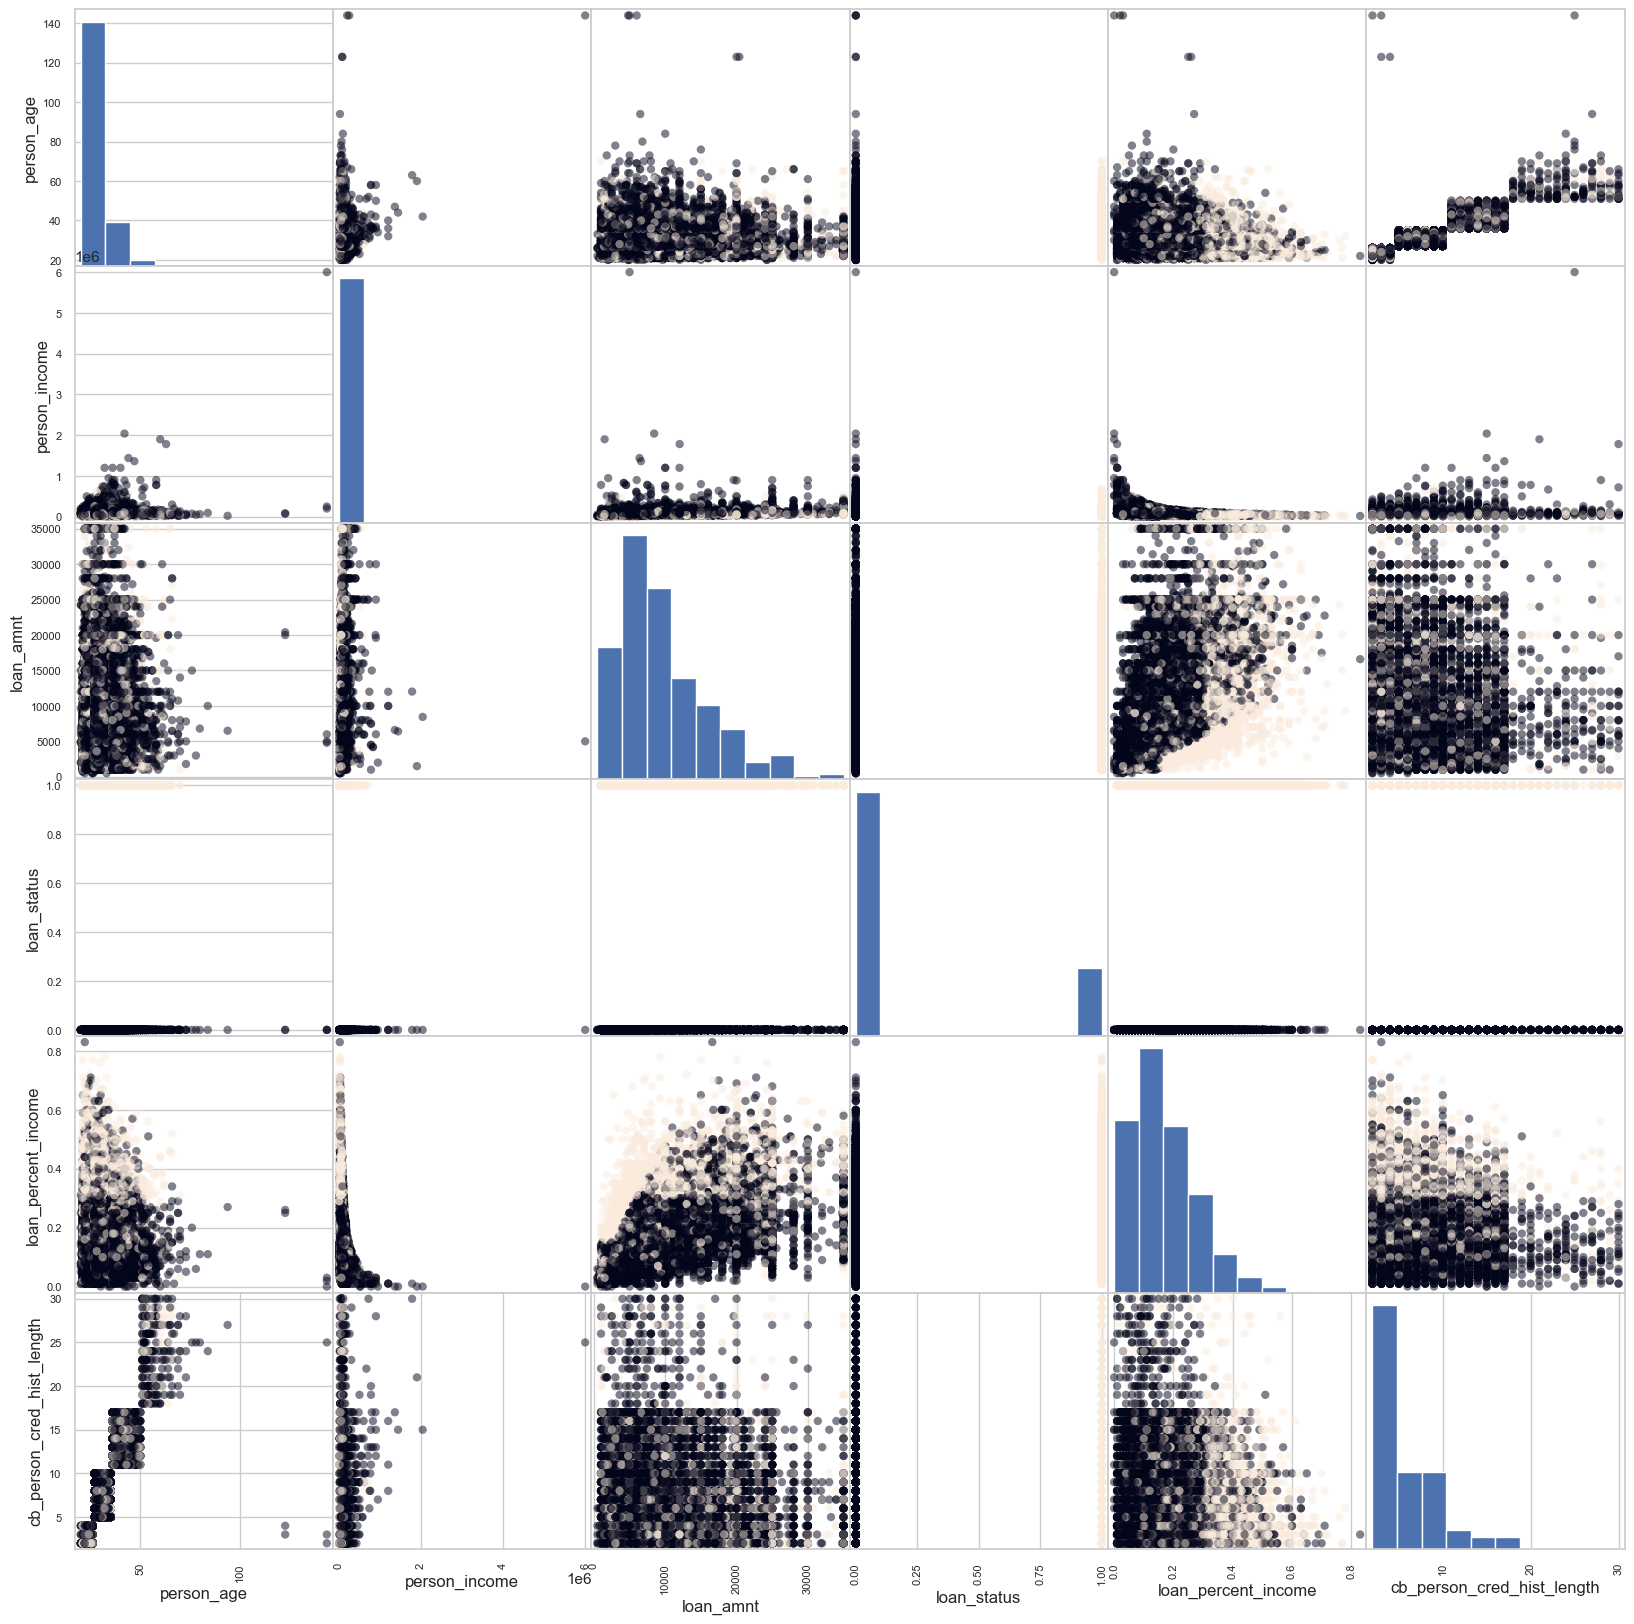

In [78]:

pd.plotting.scatter_matrix(df1,figsize=(20,20),grid=True, 
                           marker='o',c=df["loan_status"])

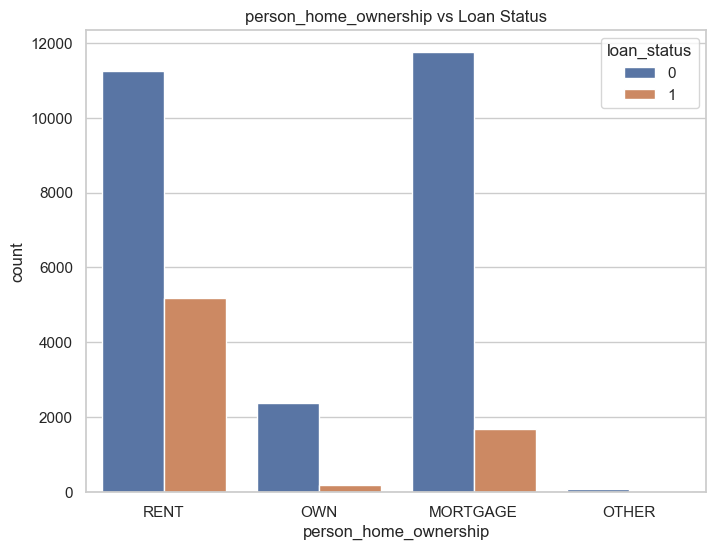

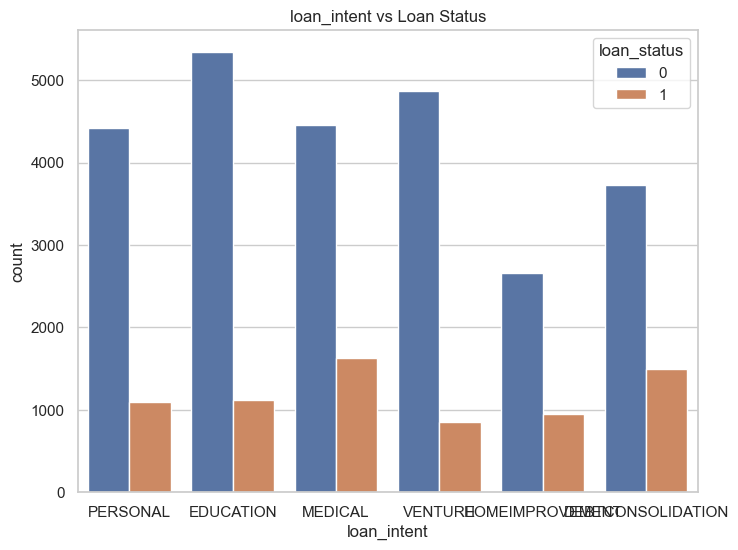

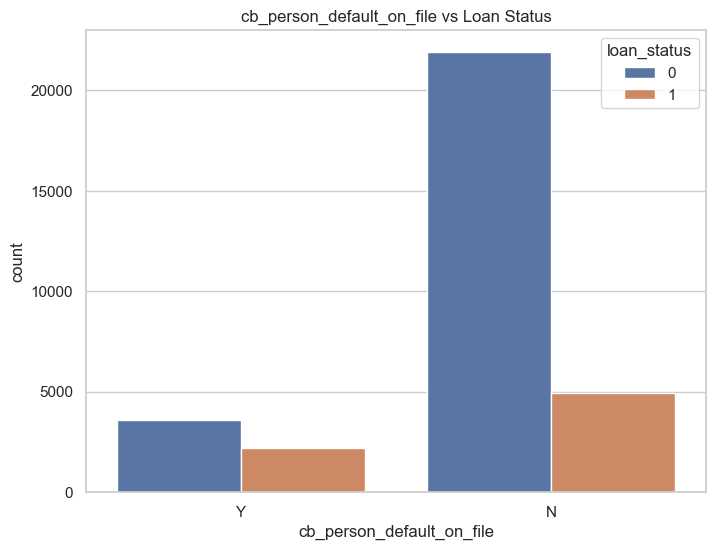

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot categorical variables (e.g., person_home_ownership, loan_intent) against loan_status
categorical_vars = ['person_home_ownership', 'loan_intent', 'cb_person_default_on_file']

for var in categorical_vars:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=var, hue='loan_status')
    plt.title(f'{var} vs Loan Status')
    plt.savefig(f'{var}_vs_Loan_Status.png')  # Save the plot as an image
    plt.show()
    plt.close()
    


In [92]:
# Independnet features
X = df_cleaned2.drop(['loan_status'], axis=1)
# Dependent feature
y = df_cleaned2['loan_status']
X.head()

person_age  person_income  person_emp_length  loan_amnt  loan_int_rate  \
0          22          59000              123.0      35000          16.02   
1          21           9600                5.0       1000          11.14   
2          25           9600                1.0       5500          12.87   
3          23          65500                4.0      35000          15.23   
4          24          54400                8.0      35000          14.27   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                          1                           3   
1                 0.10                          0                           2   
2                 0.57                          0                           3   
3                 0.53                          0                           2   
4                 0.55                          1                           4   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                        False                      False   
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   person_home_ownership_RENT  loan_intent_EDUCATION  \
0                        True                  False   
1                       False                   True   
2                       False                  False   
3                        True                  False   
4                        True                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                        False                False                  True   
1                        False                False                 False   
2                        False                 True                 False   
3                        False                 True                 False   
4                        False                 True                 False   

   loan_intent_VENTURE  
0                False  
1                False  
2                False  
3                False  
4                False

In [94]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: loan_status, dtype: int64

In [96]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20,random_state=42)

In [102]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# summarize class distribution
print("Before oversampling: ",Counter(y_train))

# define oversampling strategy
SMOTE= SMOTE()

# fit and apply the transform 
X_train,y_train= SMOTE.fit_resample(X_train,y_train)

# summarize class distribution
print("After oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 19740, 1: 5479})
After oversampling:  Counter({0: 19740, 1: 19740})


In [104]:
from sklearn.linear_model import LogisticRegression
logit= LogisticRegression()
logit.fit(X_train, y_train)
# Predicting the model
pred_logit= logit.predict(X_test)

In [110]:
from sklearn.metrics import classification_report, accuracy_score

print("The accuracy of logit model is:", accuracy_score(y_test, pred_logit))
print(classification_report(y_test, pred_logit))

The accuracy of logit model is: 0.7766851704996035
              precision    recall  f1-score   support

           0       0.92      0.78      0.85      4976
           1       0.48      0.76      0.59      1329

    accuracy                           0.78      6305
   macro avg       0.70      0.77      0.72      6305
weighted avg       0.83      0.78      0.79      6305



In [112]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
# Fitting the model
rf.fit(X_train,y_train)
# Predicting the model
pred_rf= rf.predict(X_test)

In [114]:
print("The accuracy of logit model is:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test,pred_rf ))

The accuracy of logit model is: 0.9081681205392546
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      4976
           1       0.84      0.70      0.76      1329

    accuracy                           0.91      6305
   macro avg       0.88      0.83      0.85      6305
weighted avg       0.91      0.91      0.91      6305



In [140]:
import xgboost as xgb

xgb_clf= xgb.XGBClassifier()
#fitting the model
xgb_clf.fit(X_train,y_train)
## Predicting the model
xgb_predict= xgb_clf.predict(X_test)

In [142]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict))
print(classification_report(y_test,xgb_predict ))

The accuracy of logit model is: 0.9178429817605075
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4976
           1       0.90      0.69      0.78      1329

    accuracy                           0.92      6305
   macro avg       0.91      0.83      0.86      6305
weighted avg       0.92      0.92      0.91      6305



In [122]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
random_search=RandomizedSearchCV(xgb_clf,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

# fitting the RandomizedSearchCV
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': [3, 4, 5, 6, 8, 10, 12,
                                                      15],
                                        'min_child_weight': [1, 3, 5, 7]},
                   scoring='roc_auc', verbose=3)

In [124]:
# Finding the best estimators
random_search.best_estimator_
# Finding the best param
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 15,
 'learning_rate': 0.2,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [156]:
import xgboost as xgb

xgb_clf_params = xgb.XGBClassifier(
    min_child_weight=3,
    max_depth=15,
    learning_rate=0.2,
    gamma=0.0,
    colsample_bytree=0.3,
    eval_metric='logloss'     # Add this to set the evaluation metric
)
#fitting the model
xgb_clf_params.fit(X_train,y_train)
## Predicting the model
xgb_predict_params= xgb_clf_best.predict(X_test)

In [158]:
print("The accuracy of logit model is:", accuracy_score(y_test, xgb_predict_params))
print(classification_report(y_test,xgb_predict_params ))

The accuracy of logit model is: 0.9108643933386201
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4976
           1       0.85      0.70      0.77      1329

    accuracy                           0.91      6305
   macro avg       0.89      0.83      0.86      6305
weighted avg       0.91      0.91      0.91      6305



In [152]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_clf,X,y,cv=10)
score.mean()

0.8866611002976781

In [160]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(xgb_clf_params,X,y,cv=10)
score.mean()

0.8670879679493062

In [162]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(rf,X,y,cv=10)
score.mean()

0.902266574739069

In [170]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Accuracy and classification report
print("The accuracy of the Random Forest model is:", accuracy_score(y_test, pred_rf))
print("\nClassification Report:\n", classification_report(y_test, pred_rf))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, pred_rf)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, pred_rf)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R²)
r2 = r2_score(y_test, pred_rf)
print("R-squared (R²):", r2)


The accuracy of the Random Forest model is: 0.9081681205392546

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      4976
           1       0.84      0.70      0.76      1329

    accuracy                           0.91      6305
   macro avg       0.88      0.83      0.85      6305
weighted avg       0.91      0.91      0.91      6305

Mean Squared Error (MSE): 0.09183187946074545
Mean Absolute Error (MAE): 0.09183187946074545
R-squared (R²): 0.44797556487845946


In [168]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, mean_absolute_error, r2_score

# Accuracy and classification report
print("The accuracy of the XGBoost model is:", accuracy_score(y_test, xgb_predict))
print("\nClassification Report:\n", classification_report(y_test, xgb_predict))

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, xgb_predict)
print("Mean Squared Error (MSE):", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, xgb_predict)
print("Mean Absolute Error (MAE):", mae)

# R-squared (R²)
r2 = r2_score(y_test, xgb_predict)
print("R-squared (R²):", r2)


The accuracy of the XGBoost model is: 0.9178429817605075

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      4976
           1       0.90      0.69      0.78      1329

    accuracy                           0.92      6305
   macro avg       0.91      0.83      0.86      6305
weighted avg       0.92      0.92      0.91      6305

Mean Squared Error (MSE): 0.08215701823949247
Mean Absolute Error (MAE): 0.08215701823949247
R-squared (R²): 0.5061335796321969
